In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot') # установка стиля графиков

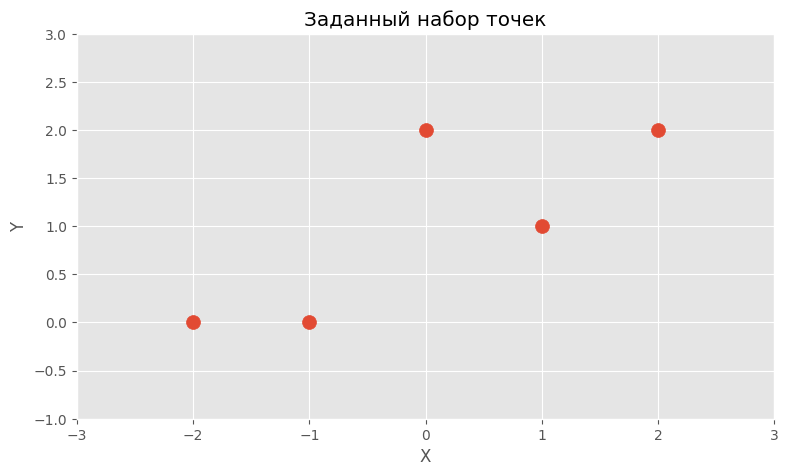

In [2]:
X = np.array([-2, -1, 0, 1, 2]) # массив абсцисс
y = np.array([0, 0, 2, 1, 2]) # массив ординат

plt.figure(figsize=(9,5)) # задание размера графика (9х5)
plt.title('Заданный набор точек') # заголовок
plt.xlabel('X') # подпись к оси абсцисс
plt.ylabel('Y') # подпись к оси ординат
plt.xlim(-3, 3) # ограничения оси абсцисс
plt.ylim(-1, 3) # пограничения оси ординат
plt.scatter(X, y, s=100) # построить график точек (X, y), размер точек s=100

In [3]:
# Зададим двумерный список (list) и преобразуем его в numpy массив (матрицу)
# Арифметические операции, применённые к numpy массиву, применяются поэлементно к его содержимому
# Задаём явно матрицу СЛАУ для нахождения прямой
A = np.array([[(X**2).sum(), (X).sum()],
              [(X).sum(), len(X)]])
b = np.array([(X*y).sum(), y.sum()])

#Решение СЛАУ через обратную матрицу
w = np.linalg.inv(A) @ b # np.linalg.inv(A) - взятие обратной матрицы
w # в Jupyter Notebook выводится объект из последней строки ячейки

array([0.5, 1. ])

In [4]:
# Cпособ решить СЛАУ в numpy напрямую 
np.linalg.solve(A, b) 

array([0.5, 1. ])

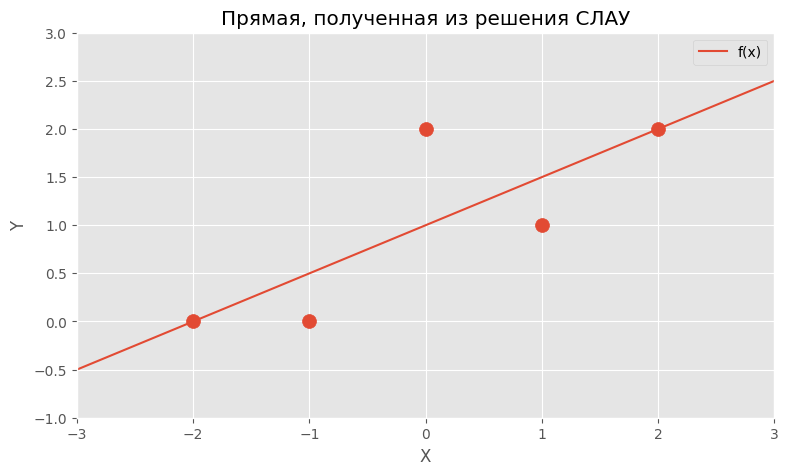

In [5]:
# Задаём функцию нашей прямой
# Аналогично можно использовать np.poly1d(w), которая вернёт полином с коэффициентами w, как функцию от x
def f(x):
    return w[0]*x + w[1] 

X_w = np.linspace(-3, 3, 100) # создаём numpy массив из 100 точек, равномерно расположенных на [-3, 3]
y_w = f(X_w) # получаем numpy массив значений в точках X_w

plt.figure(figsize=(9,5))
plt.title('Прямая, полученная из решения СЛАУ')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-1, 3)
plt.scatter(X, y, s=100)
plt.plot(X_w, y_w, label='f(x)') # построить график по точкам (последовательно соединяет точки отрезками)
plt.legend() # отобразить легенду графика

In [6]:
# находим сумму квадратов отклонений по формуле
SS = ((y-f(X))**2).sum()
print('Сумма квадратов отклонений: ', SS) 
print('Среднеквадратическое отклонение: ', (np.sqrt(SS) / len(y)).round(2) ) 

Сумма квадратов отклонений:  1.5
Среднеквадратическое отклонение:  0.24


In [7]:
# Явно задаём матрицу СЛАУ для нахождения параболы
A2 = np.array([[(X**4).sum(), (X**3).sum(), (X**2).sum()],
              [(X**3).sum(), (X**2).sum(), (X).sum()],
              [(X**2).sum(), (X).sum(), len(X)]])
b2 = np.array([(X**2 * y).sum(), (X * y).sum(), y.sum()])
w2 = np.linalg.solve(A2, b2)
w2

array([-0.07142857,  0.5       ,  1.14285714])

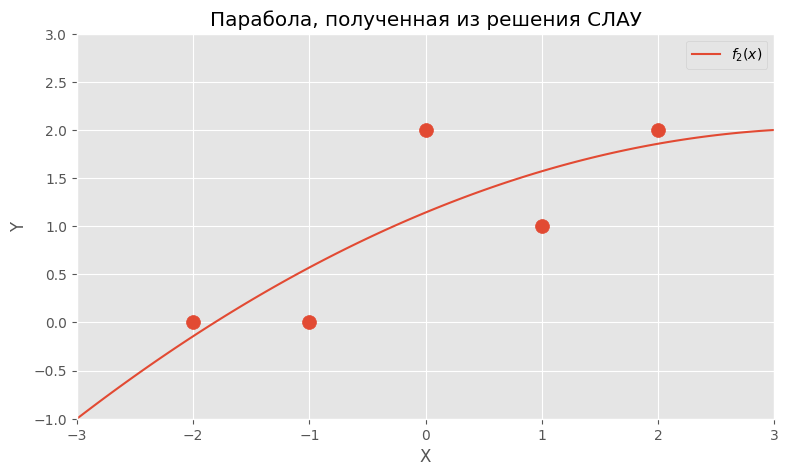

In [13]:
def f2(x):
    return w2[0] * x**2 + w2[1] * x + w2[2]

X_w2 = np.linspace(-3, 3, 100)
y_w2 = f2(X_w2)

plt.figure(figsize=(9,5))
plt.title('Парабола, полученная из решения СЛАУ')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-1, 3)
plt.scatter(X, y, s=100)
plt.plot(X_w2, y_w2, label='$f_{2}(x)$')
plt.legend()

In [11]:
# Общая функция для нахожденя полинома степени M по точкам (x, y)
def find_poly(x, y, M):
    # Можно показать, что элементы матрицы СЛАУ имеют вид x^(i + j), где i и j - номера столбцов и строк
    A = [[(x**(i + j)).sum() for j in range(M+1)] for i in range(M+1)]
    A = np.array(A)
    b = np.array([y * x**i for i in range(M+1)])
    return np.linalg.solve(A, b)

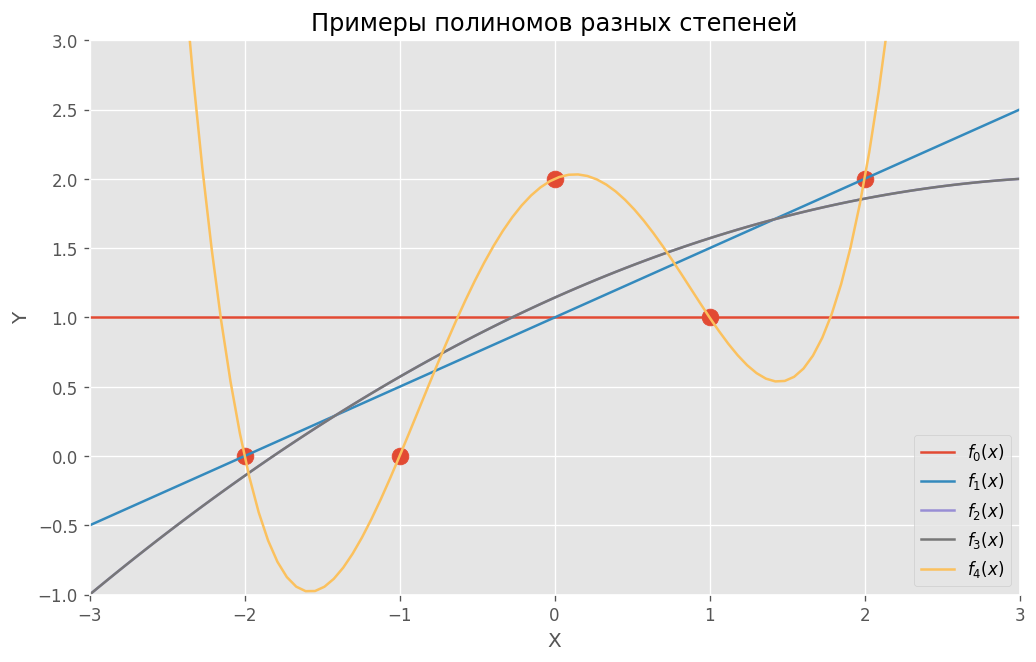

In [12]:
# Найдём полиномы различных степеней для нашего набора
W = []
F = []
for i in range(5): # 0, 1, ..., 4
    w0 = np.polyfit(X, y, i) # находит коэффициенты полинома (аналогично решению СЛАУ)
    W.append(w0) # вставить набор коэффициентов в список
    F.append(np.poly1d(w0)) # вставить полином (функцию) в список

x0 = np.linspace(-3, 3, 100)

plt.figure(figsize=(10,6), dpi=120)
plt.title('Примеры полиномов разных степеней')
plt.scatter(X, y, s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-3, 3)
plt.ylim(-1, 3)
for i in range(5): # рисуем 5 полученных функций на графике
    plt.plot(x0, F[i](x0), label=f'$f_{i}(x)$')
# matplotlib понимает формулы в формате LaTeX
# для этого нужно обернуть формлулу в $_$ 
# f-строка (приписка f перед строкой) позволяет вставлять в строку значения переменных (в фигурных скобках)
plt.legend()